# Linear Regression with closed form solution

Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline

In [95]:
def computeCost(X, Y, theta):
    """
    Calculates the overall cost and returns it
    to the caller.
    
    Parameters
    ----------
    X : Nxd matrix
        N is number of samples and d is number of params
    Y : Nx1 matrix
        The matrix storing the actual outputs
    theta: 1xd matrix
        The matrix storing regression parameters
    
    Returns
    -------
    float
        Overall cost for the current step calculated
        as (sum of squared error) / (2 * N)
    """
    inner = np.power((X * theta - Y), 2)
    return np.sum(inner) / (2 * len(X))

In [51]:
def computeTheta(X, Y):
    """
    Calculates theta using the closed form solution.
    This method uses the following formula to
    calculate the value of regression parameters:
    theta = ((X.T*X)^(-1))*(X.T*Y)
    where:
        X is a matrix storing the input data points,
        Y is the observed outputs,
        X.T represents the transpose of a matrix X and
        theta is a matrix storing the regression params
    
    Parameters
    ----------
    X : Nxd matrix
        N is the number of input samples and d is 
        the number of features
    Y : Nx1 matrix
        The matrix storing the actual outputs
    
    Returns
    -------
    dx1 matrix
        The calculated regression parameters
    """
    inversePart = np.power(X.T * X, -1)  #
    rest = X.T * Y
    return inversePart * rest

In [38]:
def add_polynomial_cols(data, degree, result_col_name):
    """
    Generate polynomial columns for all
    columns in the data based on the
    specified degree.
    
    Parameters
    ----------
    data : Pandas DataFrame
        The data to be manipulated
    degree : Integer
        The polynomial degree
    result_col_name : String
        The name of the column that stores
        the results
    
    Returns
    -------
    Pandas DataFrame
        storing the updated data
    """
    # Fetch the list of column names
    cols = list(data.columns.values)
    
    # Create polynomial columns for all
    # except the result column
    for col in cols:
        if (col != result_col_name):
            for i in range(degree + 1):
                if (i != 1):
                    new_col_name = col + str(i)
                    data[new_col_name] = data[col].apply(lambda x: pow(x, i))
        
    return data

In [147]:
def pre_process(data, result_col_name, degree):
    # Add polynomial columns
    data = add_polynomial_cols(data, degree, result_col_name)
    
    # Split data and result columns into
    # X and Y
    data_cols = list(data.columns.values)
    data_cols.remove(result_col_name)
    
    X = data[data_cols]
    X = np.matrix(X.values)
    
    Y = data[[result_col_name]]
    Y = np.matrix(Y.values)
    
    return X, Y

def load_train_data(path):
    train_data = sio.loadmat(path)
    train_data = pd.DataFrame(np.hstack((train_data['X_trn'], train_data['Y_trn'])))
    train_data.columns = ['X_trn', 'Y_trn']
    return train_data

def plot_training_data_fit(train_data, degree, theta):
    x = np.linspace(train_data.X_trn.min(), train_data.X_trn.max(), 100)

    f = 0
    for i in range(degree + 1):
        f += (theta[i, 0] * pow(x, i))

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, f, 'r', label='Prediction')
    ax.scatter(train_data.X_trn, train_data.Y_trn, label='Traning Data')
    ax.legend(loc=2)
    ax.set_xlabel('X_trn')
    ax.set_ylabel('Y_trn')
    ax.set_title('Predicted X_trn vs. Y_trn')

def generate_model(path, result_col_name, degree):    
    train_data = load_train_data(path)
    X, Y = pre_process(train_data, result_col_name, degree)
    
    theta = computeTheta(X, Y)
    print("Theta: ", theta)
    
    train_error = computeCost(X, Y, theta)
    print("Train error: ", train_error)
    
    plot_training_data_fit(train_data, degree, theta)
    
    return theta

def load_test_data(path):
    test_data = sio.loadmat(path)
    test_data = pd.DataFrame(np.hstack((test_data['X_tst'], test_data['Y_tst'])))
    test_data.columns = ['X_tst', 'Y_tst']
    return test_data

def plot_test_data_fit(test_data, degree, theta):
    x = np.linspace(test_data.X_tst.min(), test_data.X_tst.max(), 100)

    f = 0
    for i in range(degree + 1):
        f += (theta[i, 0] * pow(x, i))

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(x, f, 'r', label='Prediction')
    ax.scatter(test_data.X_tst, test_data.Y_tst, label='Test Data')
    ax.legend(loc=2)
    ax.set_xlabel('X_tst')
    ax.set_ylabel('Y_tst')
    ax.set_title('Predicted X_tst vs. Y_tst')

def predict(path, result_col_name, degree, theta):
    test_data = load_test_data(path)
    X, Y = pre_process(test_data, result_col_name, degree)
    
    test_error = computeCost(X, Y, theta)
    print("Test error: ", test_error)
    
    plot_test_data_fit(test_data, degree, theta)

Theta:  [[ 381.22587064]
 [ 883.56557018]
 [  99.8521827 ]
 [  43.81219824]
 [  10.97272652]
 [   4.76231624]]
Train error:  8745136.6456
Test error:  634885528.886


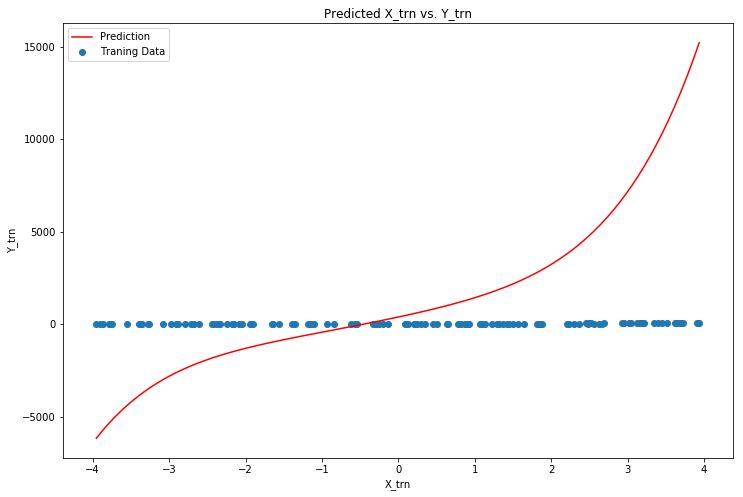

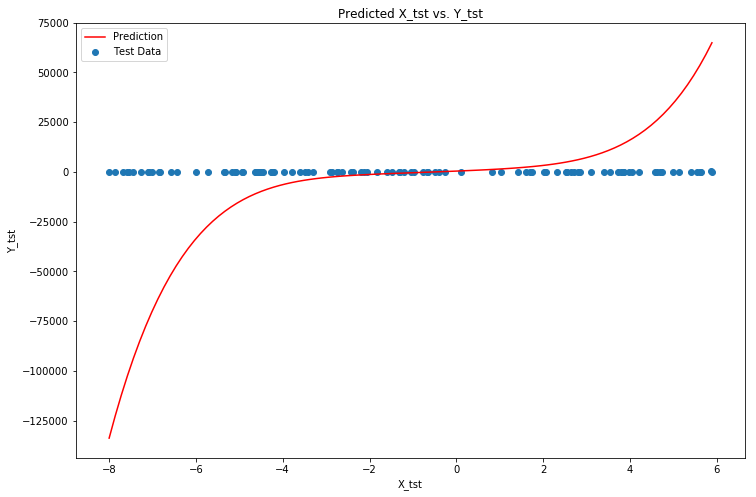

In [152]:
path = "dataset1.mat"
result_col_name = "Y_trn"
degree = 5

theta = generate_model(path, result_col_name, degree)

result_col_name = "Y_tst"

predict(path, result_col_name, degree, theta)